# Analyse Cifar100 runs with various learning rates and batch sizes

In [1]:
%matplotlib inline
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd

In [2]:
!ls cifar*.log

cifar-series-4.log cifar-series.log   cifar_errors.log


In [3]:
batch_learn_pattern = re.compile(r"^b\s+(\d+)\s+l\s+([0-9\.]+)")
output_pattern = re.compile(r"^(\d+)\s+([0-9\.]+)\s+([0-9\.]+)\s+([0-9\.]+)\s+([0-9\.]+)\s+([0-9\.]+)")

In [4]:
filename="cifar-series.log"

In [46]:
debug = False
with open(filename,"r") as f:
    lines = f.readlines()
    batch = 0
    epoch = 0    
    run = 0
    loss = 0
    acc = 0
    time = 0
    df = pd.DataFrame(data=None,columns=["batch","learn","loss","acc","time","epochs"])
    for line in lines:
        s = line.strip()
        m = batch_learn_pattern.match(s)        
        if m:
            batch = int(m.group(1))
            learn = float(m.group(2))            
            epoch = 0
            run += 1
            if debug: print "New run with:",batch,learn
        else:
            m = output_pattern.match(s)
            if m:
                epoch = int(m.group(1))
                if epoch == 100:
                    loss= 0
                    acc = 0
                    time = 0
                    #df.loc[run] = [batch,learn,loss,acc,time,0]
                    if debug: print "Accuracy not reached",epoch
                else:
                    loss = float(m.group(3))
                    acc = float(m.group(5))
                    time = float(m.group(6))                    
            else:
                if epoch > 0 and epoch < 100:
                    if debug: print "Reached accuracy threshold at",epoch
                    if debug: print batch,learn,loss,acc,time
                    df.loc[run] = [batch,learn,loss,acc,time,epoch]
df.iloc[:5]

,batch,learn,loss,acc,time,epochs
3,32.0,0.050,1.48982,0.603634,4735.68,76.0
4,32.0,0.025,1.51389,0.604133,3426.46,55.0
5,32.0,0.010,1.49138,0.622704,3178.07,51.0
6,32.0,0.005,1.60805,0.600339,3055.31,49.0
10,48.0,0.050,1.40515,0.636962,4466.21,76.0


In [47]:
loss_df = df[['batch','learn','loss']]
acc_df = df[['batch','learn','acc']]
time_df = df[['batch','learn','time']]
epoch_df = df[['batch','learn','epochs']]

In [48]:
def plotHeatMap(df,title=None,cmap=None):
    plt.rcParams['figure.figsize'] = 7,6 
    plt.pcolormesh(df,cmap=cmap)
    plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
    plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
    for y in range(df.shape[0]):
        for x in range(df.shape[1]):
            if df.iloc[y,x] > 0:
                plt.text(x+0.5,y+0.5,'{:.3f}'.format(df.iloc[y,x]),
                         color="black",fontsize=7,
                         horizontalalignment='center',
                         verticalalignment='center',                    
                         bbox={'facecolor':'white','edgecolor':'none', 'alpha':0.2, 'pad':0})
    plt.title(title)
    plt.xlabel("learning rate")
    plt.ylabel("minibatch size")
    plt.colorbar()
    plt.show()

In [49]:
loss_T = loss_df.pivot(index="batch",columns="learn",values="loss")
acc_T = acc_df.pivot(index="batch",columns="learn",values="acc")
time_T = time_df.pivot(index="batch",columns="learn",values="time")
epoch_T = epoch_df.pivot(index="batch",columns="learn",values="epochs")

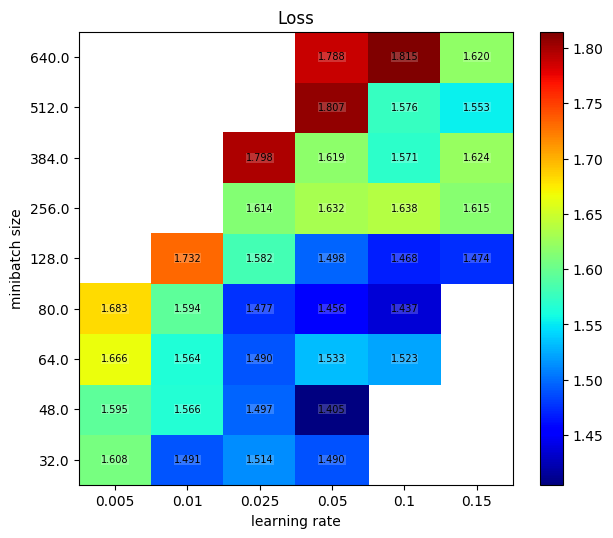

In [50]:
plotHeatMap(loss_T,"Loss","jet")

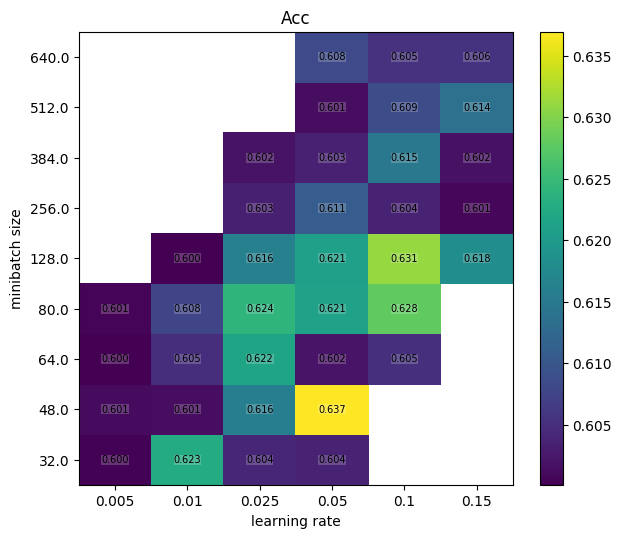

In [51]:
plotHeatMap(acc_T,"Acc")

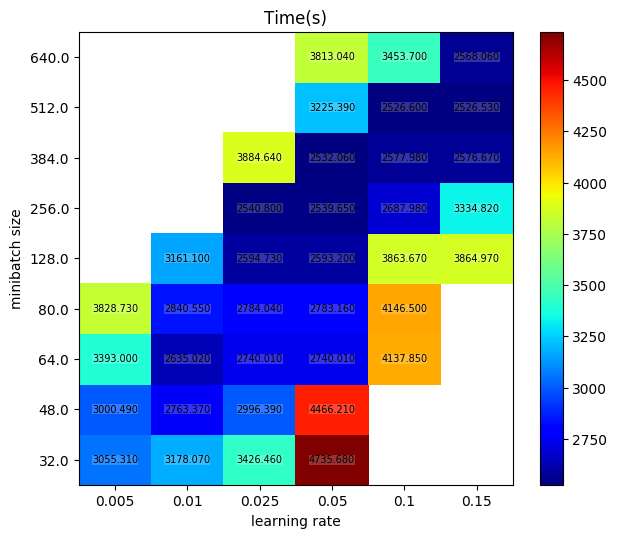

In [52]:
plotHeatMap(time_T,"Time(s)","jet")

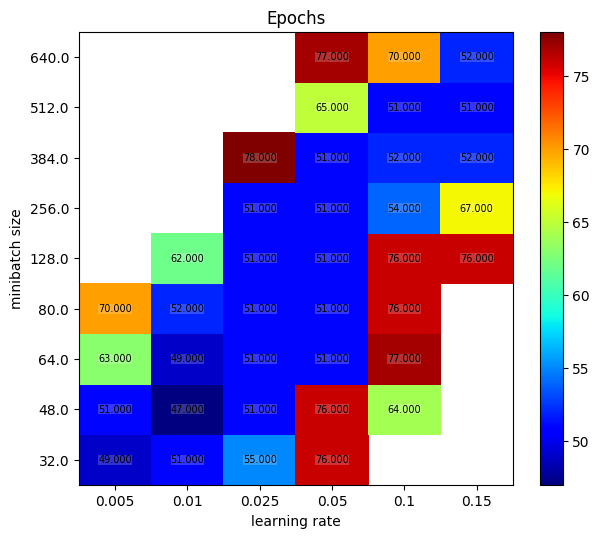

In [45]:
plotHeatMap(epoch_T,"Epochs","jet")